<a href="https://colab.research.google.com/github/myrondza/Data-Science-Machine-Learning-Deep-Learning-AI-Guide-Algorithms/blob/master/Data_Science_Machine_Learning_Deep_Learning_AI_Algorithms_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Guide

#  (Data Mining) - Data Source Connections

### Microsoft SQL

In [0]:
import pymssql

server = getenv("xxx.xxx.xx.xx")
user = getenv("username")
password = getenv("password")

conn = pymssql.connect(server, user, password, "tempdb")
cursor = conn.cursor()

cursor.execute("""
                        IF OBJECT_ID('persons', 'U') IS NOT NULL
                            DROP TABLE persons
                        CREATE TABLE persons (
                            id INT NOT NULL,
                            name VARCHAR(100),
                            salesrep VARCHAR(100),
                            PRIMARY KEY(id)
                        )
"""
)


cursor.executemany(
    "INSERT INTO persons VALUES (%d, %s, %s)",
    [(1, 'John Smith', 'John Doe'),
     (2, 'Jane Doe', 'Joe Dog'),
     (3, 'Mike T.', 'Sarah H.')])


conn.commit()

cursor.execute('SELECT * FROM persons')
row = cursor.fetchone()
while row:
    print("ID=%d, Name=%s" % (row[0], row[1]))
    row = cursor.fetchone()

conn.close()

#### TM1 Connection

In [0]:
from TM1py import TM1Service
ADDRESS = 'xxx.xxx.xx.xx'
PORT = 12354
USER = 'admin'
PASSWORD = 'apple'
SSL = False
DECODE_B64 = False

CUBE = ""
VIEW = ""

with TM1Service(address=ADDRESS, port=PORT, user=USER, password=PASSWORD, ssl=SSL, decode_b64=DECODE_B64) as tm1:
    df = tm1.cubes.cells.execute_view_dataframe_pivot(
        cube_name=CUBE,
        view_name=VIEW)

# (Data Cleaning)

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Pandas Data Frame 

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. 

In [0]:
df = pd.read_csv(r'kc_house_data.csv', error_bad_lines=False)
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [0]:
X = df[["bedrooms","sqft_living","floors","bathrooms"]]
#X = df["sqft_living"]
#y = df["price"]
#y = df["waterfront"]
y = df["grade"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14480, 4)
(14480,)
(7133, 4)
(7133,)


# (Data Exploration)

#  (Predictive Modeling) - Machine Learning

## Supervised Algorithms (Machine Learning)

Given a set of data points {x(1),...,x(m)} associated to a set of outcomes {y(1),...,y(m)}, we want to build a classifier that learns how to predict y from x.

### Regression

#### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score


linreg = LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025801802472102
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025801802472102
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4190853.1986948266
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174286.3120128403
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74492754485.58958
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15824984512419465
-------------

#### Linear Ridge Regression

In [0]:
from sklearn import linear_model
from sklearn import metrics

linrid = linear_model.Ridge(
    alpha=1.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,
)
linrid.fit(X_train, y_train)

y_pred = linrid.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025798594802962
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025798594802962
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4190861.3067016643
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174286.19780452107
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74492802611.21846
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.158249164482852
--------------

#### Linear Lasso Regression

In [0]:
from sklearn import linear_model
from sklearn import metrics

linlass = linear_model.Lasso(
    alpha=1.0,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)

linlass.fit(X_train, y_train)

y_pred = linlass.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025802829016262
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025802829016262
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4190849.4994220138
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174286.1065858295
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74492739745.50328
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15824910236510256
-------------

#### Support Vector Machines Regression

In [0]:
from sklearn import svm
from sklearn import metrics

svr = svm.SVR(
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

svr.fit(X_train, y_train)  

y_pred = svr.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 2.9634962457336655e-05
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 2.9634962457336655e-05
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 6612478.372652433
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 227198.9448046691
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 158702470236.78464
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.2852188207333007
------

#### Transformed Target Regressor

In [0]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

def func(x):
    return np.log(x)
def inverse_func(x):
    return np.exp(x)

regr = TransformedTargetRegressor( transformer = QuantileTransformer(output_distribution='normal'),
                                   regressor=linreg,
                                   #func=func,
                                   #inverse_func=inverse_func
                                 )
# Either use transformer or function & inverese function

regr.fit(X_train, y_train) 

y_pred = regr.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.11963992266389734
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.11963992266389734
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 6755529.695166179
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 178196.28431840078
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 132857992866.61635
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.1475434631407419
-----------

#### Bayesian Ridge Regression

In [0]:
from sklearn import linear_model
from sklearn import metrics

linbayes = linear_model.BayesianRidge(
    n_iter=300,
    tol=0.001,
    alpha_1=1e-06,
    alpha_2=1e-06,
    lambda_1=1e-06,
    lambda_2=1e-06,
    compute_score=False,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    verbose=False,
)

linbayes.fit(X_train, y_train)

y_pred = linbayes.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025528854309511
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025528854309511
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4191516.4445031728
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174277.88125644284
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74496848244.177
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15819791385822218
--------------

#### Huber Regression

In [0]:
from sklearn import linear_model
from sklearn import metrics

linhub = linear_model.HuberRegressor(
    epsilon=1.35,
    max_iter=100,
    alpha=0.0001,
    warm_start=False,
    fit_intercept=True,
    tol=1e-05,
)

linhub.fit(X_train, y_train)

y_pred = linhub.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.4740211311371182
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.4740211311371182
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4734852.297902894
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 169708.0772657343
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 80388824246.9135
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15027959150311426
---------------

#### RANdom SAmple Consensus Regression

In [0]:
from sklearn import linear_model
from sklearn import metrics
from numpy import inf

linran = linear_model.RANSACRegressor(
    base_estimator=None,
    min_samples=None,
    residual_threshold=None,
    is_data_valid=None,
    is_model_valid=None,
    max_trials=100,
    max_skips=inf,
    stop_n_inliers=inf,
    stop_score=inf,
    stop_probability=0.99,
    loss='absolute_loss',
    random_state=None,
)

linran.fit(X_train, y_train)

y_pred = linran.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.37520435402368024
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.37520435402368024
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 5235219.298239896
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 193614.88621373053
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 113351261622.01985
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.2053681191889484
-----------

#### Decision Tree Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics

dtree = DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False,
)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.2392491572348504
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.2392491572348504
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 5420000.0
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 202820.2999407902
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 113909852129.01071
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.21368509200142008
---------------------

#### Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(
    n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)

rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)
from sklearn import metrics

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.4516637920799279
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.4516637920799279
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4377000.0
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 181604.04387443163
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 82110170862.77086
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.1710767777571059
----------------------

#### XGBoost Regression

In [0]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    silent=True,
    objective='reg:linear',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
    importance_type='gain',
)

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5373906994756107
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5373906994756107
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4975684.0
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 165979.19164446936
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 69268602953.5168
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.14214645627777067
----------------------

#### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
from sklearn import metrics

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.32885442606741144
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.32885442606741144
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4420000.0
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 189388.72872564138
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 109475929934.12645
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.18338691437342883
------------------

#### Multi-layer perceptron (MLP) Regression

In [0]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
)

mlpreg.fit(X_train, y_train)

y_pred = mlpreg.predict(X_test)
from sklearn import metrics

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.4841194901326197
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.4841194901326197
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4440412.303482478
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 176192.58390430172
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 77246107344.6375
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.1611054350114478
---------------

#### Star Boost Regression

In [0]:
!pip install starboost
from sklearn import datasets
from sklearn import tree
import starboost as sb


strboost = sb.BoostingRegressor(
    loss=None,
    base_estimator=tree.DecisionTreeRegressor(max_depth=3),
    tree_flavor=False,
    n_estimators=30,
    init_estimator=None,
    line_searcher=None,
    learning_rate=0.1,
    row_sampling=1.0,
    col_sampling=1.0,
    eval_metric=None,
    early_stopping_rounds=None,
    random_state=None,
)

strboost.fit(X_train, y_train)

y_pred = strboost.predict(X_test)


print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5225639625191154
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5225639625191154
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4422148.5
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 169562.46440400253
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 71492156643.59364
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15011786565761953
---------------------

### Classification

#### Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import hinge_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import zero_one_loss




dtree = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.985279685966634
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.011387798495256788
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5206270627062706
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.014720314033366046
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.99      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


#### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

rfc = RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9892051030421982
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.009684058445098682
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5068756875687569
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.010794896957801767
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      0

#### XGBoost Classifier

In [0]:
from xgboost import XGBClassifier

xgc = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    silent=True,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None
)

xgc.fit(X_train,y_train)

y_pred = xgc.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9911678115799804
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7070
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

#### Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

naive = GaussianNB(
    priors=None,
    var_smoothing=1e-09)

naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9798121407542408
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.025937001260228867
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5807952223793807
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.020187859245759148
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.99      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


#### Stocastic Gradient Descent

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

sgd = SGDClassifier(
    loss='hinge',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
    average=False,
)

sgd.fit(X_train, y_train)  

y_pred = sgd.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9911678115799804
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7070
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

#### Bagging Classifier

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error, r2_score

bgclass = BaggingClassifier(
    base_estimator=None,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)

bgclass.fit(X_train,y_train)

y_pred = bgclass.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9894854899761671
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.009825781801107752
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.507017130284457
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.01051451002383289
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      0.9

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


#### Adaboost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score

abclass = AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)

abclass.fit(X_train,y_train)

y_pred = abclass.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9908874246460115
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.012660248921289158
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5077243438629577
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.009112575353988505
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


#### Voting Classifier

In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error, r2_score

vclass = VotingClassifier(
    estimators=[('rfr', rfr), ('dtree', dtree)],
    voting='hard',
    weights=None,
    n_jobs=None,
    flatten_transform=True,
)

vclass.fit(X_train,y_train)

y_pred = vclass.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

#### Multi-layer perceptron (MLP) Classifier

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
)

mlp.fit(X_train, y_train)                         
y_pred = mlp.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9911678115799804
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7070
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being 

#### MultiOutput Classifier

In [0]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y = make_classification(n_samples=10, n_features=100, n_informative=30, n_classes=3, random_state=1)
y2 = shuffle(y, random_state=1)
y3 = shuffle(y, random_state=2)
Y = np.vstack((y, y2, y3)).T
n_samples, n_features = X.shape
n_outputs = Y.shape[1] 
n_classes = 3
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

#### MultiOutput Regressor

In [0]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X, y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

#### Feature Selection

In [0]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(
    estimator,
    threshold=None,
    prefit=False,
    norm_order=1,
    max_features=None,
)
X_new = model.transform(X)

A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

## Semi - Supervised Algorithms (Machine Learning)

### Label Propagation

In [0]:
from sklearn.semi_supervised import LabelPropagation

label_prop_model = LabelPropagation(
    kernel='rbf',
    gamma=20,
    n_neighbors=7,
    max_iter=1,
    tol=0.001,
    n_jobs=None,
)

label_prop_model.fit(X_train,y_train)

y_pred = label_prop_model.predict(X_test)
from sklearn import metrics

print("--------------------------------------------------------------------------------------------------")
print("R2 Score :",metrics.r2_score(y_test,y_pred))
print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=1 was reached without convergence.
  category=ConvergenceWarning


--------------------------------------------------------------------------------------------------
R2 Score : -0.23311331133113344
--------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


### Label Spreading

In [0]:
from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading(
    kernel='rbf',
    gamma=20,
    n_neighbors=7,
    max_iter=1,
    tol=0.001,
    n_jobs=None,
)

label_prop_model.fit(X_train,y_train)

y_pred = label_prop_model.predict(X_test)
from sklearn import metrics

print("--------------------------------------------------------------------------------------------------")
print("R2 Score :",metrics.r2_score(y_test,y_pred))
print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=1 was reached without convergence.
  category=ConvergenceWarning


--------------------------------------------------------------------------------------------------
R2 Score : -0.23311331133113344
--------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/label_propagation.py:201: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


## Unsupervised Algorithms (Machine Learning)

### K-Means Clustering

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import calinski_harabasz_score
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import silhouette_samples
from sklearn.metrics.cluster import v_measure_score


kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
).fit(X_train)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

kmeans.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,kmeans.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,kmeans.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,kmeans.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,kmeans.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

[1 3 3 ... 3 0 1]
[[2.74295223e+00 1.23820889e+03 1.31959671e+00 1.50650940e+00]
 [3.97142857e+00 2.95975111e+03 1.72730159e+00 2.64920635e+00]
 [4.33989501e+00 4.46663780e+03 1.90879265e+00 3.49606299e+00]
 [3.46813187e+00 2.01567070e+03 1.47802198e+00 2.17861722e+00]]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 32526.736957525507
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 0.5566293464169927
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.5422620112860752
--------------------------------------------------------------------------------------------------
Silhouette Samples : [0.35219067 0.71658154 0.38709775 ... 0.73079125 0.47518937 0.70869416]
-------------

### Spectral Clustering

In [0]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(
    n_clusters=4,
    eigen_solver=None,
    random_state=None,
    n_init=10,
    gamma=1.0,
    affinity='rbf',
    n_neighbors=10,
    eigen_tol=0.0,
    assign_labels='kmeans',
    degree=3,
    coef0=1,
    kernel_params=None,
    n_jobs=None,
).fit(X_train)

print(spec.labels_)
print(spec.cluster_centers_)

spec.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,spec.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,spec.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,spec.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,spec.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

### DBSCAN Clustering

In [0]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.5,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
).fit(X_train)

print(dbscan.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,dbscan.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

[  0   1   2 ... 369  -1 516]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 20.34504046130372
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 4.8839357456327575
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.1700204070337957
--------------------------------------------------------------------------------------------------
Silhouette Samples : [ 0.4850618   0.81076289  0.63390284 ...  0.87110883 -0.89222697
  0.963909  ]
--------------------------------------------------------------------------------------------------


### Agglomerative Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

aggclus = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    pooling_func='deprecated',
    distance_threshold=None,
).fit(X_train)

print(aggclus.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,aggclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,aggclus.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,aggclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,aggclus.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

[0 1 1 ... 1 1 0]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 23781.015897196357
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 0.5953727648396083
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.5918015713057287
--------------------------------------------------------------------------------------------------
Silhouette Samples : [0.43616478 0.38290124 0.72894623 ... 0.41220805 0.56112077 0.63895725]
--------------------------------------------------------------------------------------------------


### Affinity Propagation

In [0]:
from sklearn.cluster import AffinityPropagation

affclus = AffinityPropagation(
    damping=0.5,
    max_iter=5,
    convergence_iter=15,
    copy=True,
    preference=None,
    affinity='euclidean',
    verbose=False,
).fit(X_train)

print(affclus.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,affclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,affclus.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,affclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,affclus.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

### OPTICS Clustering

In [0]:
from sklearn.cluster import OPTICS

optics = OPTICS(
    min_samples=5,
    max_eps=1,
    metric='minkowski',
    p=2,
    metric_params=None,
    cluster_method='xi',
    eps=None,
    xi=0.05,
    predecessor_correction=True,
    min_cluster_size=None,
    algorithm='auto',
    leaf_size=30,
    n_jobs=None,
).fit(X_train)

print(optics.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,optics.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,optics.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,optics.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,optics.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/optics_.py:795: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[  0   3   8 ... 126  -1 943]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 14.270531803286424
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 5.1442510762486675
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.21567074450206808
--------------------------------------------------------------------------------------------------
Silhouette Samples : [-0.01008472  0.81553195  0.53972157 ...  1.         -0.87959254
  0.93652039]
--------------------------------------------------------------------------------------------------


In [0]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=20,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='legacy',
    novelty=False,
    n_jobs=None,
).fit(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linreg,X,y, cv=5) 
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for X_ktrain, X_ktest in kf.split(X):
    print("%s %s" % (X_ktrain,X_ktest))

In [0]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=None)
for X_rtrain, X_rtest in rkf.split(X):
    print("%s %s" % (X_rtrain, X_rtest))

In [0]:
import pickle
model_stored = pickle.dumps(linreg)
model_loaded = pickle.loads(model_stored)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

estimators = [(
    
                'reduce_dim', 
                PCA(
                n_components=None,
                copy=True,
                whiten=False,
                svd_solver='auto',
                tol=0.0,
                iterated_power='auto',
                random_state=None,
    )

),(
    
                'linreg', 
                LinearRegression(
                fit_intercept=True,
                normalize=False,
                copy_X=True,
                n_jobs=None,
                )

)]


pipe = Pipeline(estimators)
pipe 

Pipeline(memory=None,
         steps=[('reduce_dim', PCA(copy=True)),
                ('linreg', LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=None,))], 
                 verbose=False)

print(pipe.steps[0])
print(pipe[0])

#  (Predictive Modeling) - Deep Learning

## Frameworks (Deep Learning)

### Tensorflow

What is Tensorflow?

TensorFlow is an end-to-end open source platform for machine learning

TensorFlow makes it easy for beginners and experts to create machine learning models. See the sections below to get started.

#### Importing Library

In [0]:
#!pip install tensorflow==2.0.0b1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


#### Eager Mode

In [0]:
# The Code Compiles and will be executed in eager mode

h=tf.constant("Hello")
w=tf.constant("World")

tf.strings.join([h,w])

<tf.Tensor: id=2, shape=(), dtype=string, numpy=b'HelloWorld'>

#### Graph Mode

In [0]:
# The Code Compiles inside the Function (@tf.function) into graph code before it is executed

import tensorflow as tf
h=tf.constant("Hello")
w=tf.constant("World")


@tf.function
def concat(x,y):
    hw = x + y
    return hw

print(concat(h,w))

tf.Tensor(b'HelloWorld', shape=(), dtype=string)


In [0]:
# The Code Compiles and will not be executed in graph mode
def concat(x,y):
    hw = x + y
    return hw

print(concat(h,w))

tf.Tensor(b'HelloWorld', shape=(), dtype=string)


In [0]:
W = tf.Variable(tf.zeros(shape=(2,2)), name="W")
b = tf.Variable(tf.ones(shape=(2)), name="b")

@tf.function
def forward(x):
    return W * x + b

output = forward([1,0])
print(output)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [0]:
W = tf.Variable(1, name="W")
b = tf.Variable(5, name="b")

@tf.function
def forward(x):
    return W * x + b

output = forward(4)
print(output)

tf.Tensor(9, shape=(), dtype=int32)


In [0]:
W.numpy()

array([[0., 0.],
       [0., 0.]], dtype=float32)

In [0]:
r1 = tf.reshape(W,[1,4])

In [0]:
r1.numpy()

array([[0., 0., 0., 0.]], dtype=float32)

### Pytorch

What  is Pytorch?

It’s a Python-based scientific computing package targeted at two sets of audiences:

A replacement for NumPy to use the power of GPUs
a deep learning research platform that provides maximum flexibility and speed

In [0]:
from __future__ import print_function
import torch

In [0]:
x = torch.empty(5, 3)
print(x)

tensor([[3.7127e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 0.0000e+00, 0.0000e+00]])


In [0]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3183, 0.0442, 0.3516],
        [0.9268, 0.0550, 0.2144],
        [0.8796, 0.3361, 0.6043],
        [0.6161, 0.7851, 0.8815],
        [0.2953, 0.3483, 0.0673]])


In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [0]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [0]:
x = x.new_ones(5, 3, dtype=torch.double)    
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [0]:
x = torch.randn_like(x, dtype=torch.float) 
print(x)

tensor([[ 0.0069, -0.2150,  0.8116],
        [-0.4522,  1.1726, -0.3885],
        [-0.1883, -1.3238,  1.5475],
        [ 1.6086, -0.4931,  0.2757],
        [-0.3276, -0.2421,  0.5482]])


In [0]:
print(x.size())

torch.Size([5, 3])


In [0]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[0.8492, 1.1307, 1.0533],
        [0.6561, 0.8633, 1.4646],
        [0.9527, 1.4221, 1.1873],
        [1.7161, 1.5844, 1.0095],
        [0.4096, 1.1961, 1.3020]])


In [0]:
print(torch.add(x, y))

tensor([[0.8492, 1.1307, 1.0533],
        [0.6561, 0.8633, 1.4646],
        [0.9527, 1.4221, 1.1873],
        [1.7161, 1.5844, 1.0095],
        [0.4096, 1.1961, 1.3020]])


In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.8492, 1.1307, 1.0533],
        [0.6561, 0.8633, 1.4646],
        [0.9527, 1.4221, 1.1873],
        [1.7161, 1.5844, 1.0095],
        [0.4096, 1.1961, 1.3020]])


Resizing: If you want to resize/reshape tensor, you can use torch.view :

In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [0]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)

np.add(a, 1, out=a)

print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [0]:
device = torch.device("cuda")          # a CUDA device object
y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
x = x.to(device)                       # or just use strings ``.to("cuda")``
z = x + y
print(z)
print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 0.4023,  1.3189,  1.7710,  1.6037],
        [-0.2375,  1.5496,  0.9762,  1.9441],
        [-0.7012, -1.6130,  1.1936, -0.2889],
        [-0.1726,  0.5142,  0.8320,  2.0435]], device='cuda:0')
tensor([[ 0.4023,  1.3189,  1.7710,  1.6037],
        [-0.2375,  1.5496,  0.9762,  1.9441],
        [-0.7012, -1.6130,  1.1936, -0.2889],
        [-0.1726,  0.5142,  0.8320,  2.0435]], dtype=torch.float64)


In [0]:
x = torch.empty(1,5)
x = x.new_ones(1,5,requires_grad=True)
print(x)

tensor([[1., 1., 1., 1., 1.]], requires_grad=True)


In [0]:
y = x + 2
print(y)

tensor([[3., 3., 3., 3., 3.]], grad_fn=<AddBackward0>)


In [0]:
print(y.grad_fn)

In [0]:
z = y.mean()
print(z)
print(z.backward())

tensor(3., grad_fn=<MeanBackward0>)
None


In [0]:
print(x.grad)

tensor([[0.4000, 0.4000, 0.4000, 0.4000, 0.4000]])


### Caffe

## Keras Functional API (Complex Architectures)

The Keras functional API lets you build much more complex architectures than the simple linear stack of Sequential models we have seen previously. It also supports more advanced models. These models include multi-input and multi-output models, models with shared layers, and models with residual connections

In [0]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(4,)) # Returns a 'placeholder' tensor
x = tf.keras.layers.Dense(128)(inputs)
x = tf.keras.layers.Dense(64, activation='relu',name='d1')(x)
x = tf.keras.layers.Dense(32, activation='relu',name='d2')(x)
x = tf.keras.layers.Dense(16, activation='relu',name='d3')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(14,activation=tf.nn.softmax, name='d4')(x)

model = tf.keras.Model(inputs=inputs, outputs=predictions)

In [0]:
optimiser = tf.keras.optimizers.RMSprop(0.01)
model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=512, epochs=10)
model.evaluate(X_test,y_test)

Epoch 1/10
14480/14480 [==============================] - 0s 18us/sample - loss: 79.3885 - acc: 0.2677
Epoch 2/10
14480/14480 [==============================] - 0s 10us/sample - loss: 2.2260 - acc: 0.4157
Epoch 3/10
14480/14480 [==============================] - 0s 9us/sample - loss: 1.9951 - acc: 0.4157
Epoch 4/10
14480/14480 [==============================] - 0s 10us/sample - loss: 1.8234 - acc: 0.4157
Epoch 5/10
14480/14480 [==============================] - 0s 9us/sample - loss: 1.7056 - acc: 0.4157
Epoch 6/10
14480/14480 [==============================] - 0s 9us/sample - loss: 1.6299 - acc: 0.4157
Epoch 7/10
14480/14480 [==============================] - 0s 8us/sample - loss: 1.5845 - acc: 0.4157
Epoch 8/10
14480/14480 [==============================] - 0s 9us/sample - loss: 1.5578 - acc: 0.4157
Epoch 9/10
14480/14480 [==============================] - 0s 9us/sample - loss: 1.5430 - acc: 0.4157
Epoch 10/10
7133/7133 [==============================] - 0s 70us/sample - loss: 1.5369 

[1.5368850278968014, 0.41525304]

##TensorFlow (Basic Architectures)

Sequential Models

## Neural Networks (Layers , Activation Functions , Optimizers)

### Vanishing Gradients Problem 

What Are Vanishing Gradients?

The vanishing gradients problem is one example of unstable behavior that you may encounter when training a deep neural network.

It describes the situation where a deep multilayer feed-forward network or a recurrent neural network is unable to propagate useful **gradient information** from the **output end** of the model back to the layers near the **input end** of the model.

A problem with training networks with many layers (e.g. deep neural networks) is that the gradient diminishes dramatically as it is propagated backward through the network.

The error may be so small by the time it reaches layers close to the input of the model that it may have **very little effect**

Deep models using the hyperbolic tangent activation function do not train easily, and much of this poor performance is blamed on the vanishing gradient problem.

Deep models using the **hyperbolic tangent activation function** do not train easily, and much of this **poor performance** is blamed on the vanishing gradient problem.
The number of hidden layers can be increased from 1 to 5


How to Fix Vanishing Gradients?

1) When using the **rectified linear activation** function (ReLU), it is good practice to use the He weight initialization scheme. We can define the MLP with five hidden layers using ReLU and He initialization, listed below.

2 ) This is because the activation function looks and acts like a linear function, making it easier to train and less likely to saturate, but is, in fact, a nonlinear function, forcing negative inputs to the value 0. It is claimed as one possible approach to addressing the vanishing gradients problem when training deeper models.

### Exploding Gradients Problem 

What Are Exploding Gradients?

An **error gradient** is the **direction and magnitude calculated** during the training of a neural network that is used to update the network **weights** in the right direction and by the right amount.

In deep networks or recurrent neural networks, **error gradients can accumulate** during an update and result in very large gradients. These in turn result in large updates to the network weights, and in turn, an **unstable network**.

At an extreme, the values of weights can become so large as to overflow and result in **NaN values**.

The explosion occurs through exponential growth by repeatedly multiplying gradients through the network layers that have values larger than 1.0.

How do You Know if You Have Exploding Gradients?

There are some subtle signs that you may be suffering from exploding gradients during the training of your network, such as:

1) The model is unable to get traction on your training data (e.g. poor loss).

2) The model is unstable, resulting in large changes in loss from update to update.

3) The model loss goes to NaN during training.

How to Fix Exploding Gradients?

1. Re-Design the Network Model

In deep neural networks, exploding gradients may be addressed by redesigning the network to have fewer layers.
There may also be some benefit in using a smaller batch size while training the network.
In recurrent neural networks, updating across fewer prior time steps during training, called truncated Backpropagation through time, may reduce the exploding gradient problem.

2. Use Long Short-Term Memory Networks

In recurrent neural networks, gradient exploding can occur given the inherent instability in the training of this type of network, e.g. via Backpropagation through time that essentially transforms the recurrent network into a deep multilayer Perceptron neural network.

Exploding gradients can be reduced by using the Long Short-Term Memory (LSTM) memory units and perhaps related gated-type neuron structures.
Adopting LSTM memory units is a new best practice for recurrent neural networks for sequence prediction.

3. Use Gradient Clipping

Exploding gradients can still occur in very deep Multilayer Perceptron networks with a large batch size and LSTMs with very long input sequence lengths.
If exploding gradients are still occurring, you can check for and limit the size of gradients during the training of your network.

4. Use Weight Regularization

Another approach, if exploding gradients are still occurring, is to check the size of network weights and apply a penalty to the networks loss function for large weight values.

(Using an L1 or L2 penalty on the recurrent weights can help with exploding gradients)

### Dense Layers

In [0]:
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None
)

### Convolutional Layers

In [0]:
tf.keras.layers.Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding='valid',
    data_format='channels_last',
    dilation_rate=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None
)

tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None
)

### Pooling Layers

In [0]:
tf.keras.layers.MaxPooling1D(
    pool_size=2,
    strides=None,
    padding='valid',
    data_format='channels_last'
)

tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None
)

tf.keras.layers.MaxPooling3D(
    pool_size=(2, 2, 2),
    strides=None,
    padding='valid',
    data_format=None
)

### Locally Connected Layers

In [0]:
tf.keras.layers.LocallyConnected1D(
    filters,
    kernel_size,
    strides=1,
    padding='valid',
    data_format=None,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    implementation=1
)

tf.keras.layers.LocallyConnected2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    implementation=1
)

### Flatten Layers

In [0]:
model.add(Conv2D(64, (3, 3),input_shape=(3, 32, 32), padding='same',))
# now: model.output_shape == (None, 64, 32, 32)
model.add(Flatten())
# now: model.output_shape == (None, 65536)

### Recurrent Layers

In [0]:
tf.keras.layers.RNN(
    cell,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    time_major=False
)

tf.keras.layers.SimpleRNN(
    units,
    activation='tanh',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False
)

tf.keras.layers.GRU(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=2,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    time_major=False,
    reset_after=True
)

tf.keras.layers.LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=2,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False
)


### Advanced Activation Layers

In [0]:
tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)
tf.keras.layers.ELU(alpha=1.0) # Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)
tf.keras.layers.Softmax(axis=-1)
tf.keras.layers.LeakyReLU(alpha=0.3) #Rectifier Nonlinearities Improve Neural Network Acoustic Models
tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None) #Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification
tf.keras.layers.ThresholdedReLU(theta=1.0) #Zero-Bias Autoencoders and the Benefits of Co-Adapting Features

### Embedding Layer - A Theoretically Grounded Application of Dropout in Recurrent Neural Networks (RNN)

In [0]:
tf.keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)

### Accelerating Deep Network Training (Reducing Internal Covariate Shift)

In [0]:
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer='zeros',
    gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones',
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None
)

### Prevent Overfitting

In [0]:
tf.keras.layers.Dropout(rate, noise_shape=None, seed=None, **kwargs)
tf.keras.layers.GaussianNoise(stddev)
tf.keras.layers.GaussianDropout(rate)
tf.keras.layers.AlphaDropout(rate, noise_shape=None, seed=None)

### Activation

In [0]:
tf.keras.activations.elu(x, alpha=1.0)
tf.keras.activations.exponential(x)
tf.keras.activations.hard_sigmoid(x)
tf.keras.activations.linear(x)
tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)
tf.keras.activations.selu(x)
tf.keras.activations.sigmoid(x)
tf.keras.activations.tanh(x)
tf.keras.activations.softmax(x, axis=-1)
tf.keras.activations.softplus(x)
tf.keras.activations.softsign(x)

### Regularizers

In [0]:
# A linear layer with L1 regularization of factor 0.01 applied to the kernel matrix:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# A linear layer with L2 regularization of factor 0.01 applied to the bias vector:
layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01))

# A linear layer with L1 & L2 regularization of factor 0.01 applied to the kernel matrix:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))

### Metrics 

In [0]:
tf.keras.metrics.CategoricalAccuracy()
tf.keras.metrics.Accuracy()
tf.keras.metrics.AUC()
tf.keras.metrics.BinaryAccuracy()
tf.keras.metrics.BinaryCrossentropy()
tf.keras.metrics.CategoricalAccuracy()
tf.keras.metrics.CategoricalCrossentropy()
tf.keras.metrics.CategoricalHinge()
tf.keras.metrics.CosineSimilarity()
tf.keras.metrics.Hinge()

tf.keras.metrics.KLD(y_true, y_pred)
tf.keras.metrics.MAE(y_true, y_pred)
tf.keras.metrics.MAPE(y_true, y_pred)
tf.keras.metrics.Mean()
tf.keras.metrics.MSE(y_true, y_pred)
tf.keras.metrics.MSLE(y_true, y_pred)

tf.keras.metrics.Poisson()
tf.keras.metrics.RootMeanSquaredError()
tf.keras.metrics.SparseCategoricalCrossentropy()



### Loss Functions

In [0]:
tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction='auto',
    name='categorical_crossentropy',
)

tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction='auto',
    name='binary_crossentropy',
)

tf.keras.losses.CategoricalHinge(
    reduction='auto',
    name='categorical_hinge',
)

tf.keras.losses.CosineSimilarity(
    axis=-1,
    reduction='auto',
    name='cosine_similarity',
)

tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    reduction='auto',
    name=None,
)

tf.keras.losses.KLD(y_true, y_pred)
tf.keras.losses.LogCosh(reduction='auto', name='logcosh')
tf.keras.losses.Poisson(reduction='auto', name='poisson')
tf.keras.losses.SquaredHinge(reduction='auto', name='squared_hinge')

tf.keras.losses.MAE(y_true, y_pred)
tf.keras.losses.MAPE(y_true, y_pred)
tf.keras.losses.MSE(y_true, y_pred)
tf.keras.losses.MSLE(y_true, y_pred)

### Optimizers

In [0]:
tf.keras.optimizers.Adadelta(
    learning_rate=0.001,
    rho=0.95,
    epsilon=1e-07,
    name='Adadelta'
)

tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad'
)

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

tf.keras.optimizers.Adamax(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Adamax'
)

tf.keras.optimizers.Nadam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Nadam'
)

tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD'
)

tf.keras.optimizers.Ftrl(
    learning_rate=0.001,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name='Ftrl',
    l2_shrinkage_regularization_strength=0.0
)

## Deep Neural Networks (DNN)

### Deep Neural Network (DNN) for Regression :

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def regression_model() :   
    model = tf.keras.Sequential()
    model.add(layers.Dense(64,input_dim=4))
    model.add(layers.Dense(32,activation=tf.nn.relu))
    model.add(layers.Dense(16,activation=tf.nn.relu))
    model.add(layers.Dense(1))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss = "mse",metrics =["accuracy"])
    
    return model


model = regression_model()
model.fit(X_train,y_train,epochs=100,batch_size=1024,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

Train on 14480 samples, validate on 7133 samples
Epoch 1/100
14480/14480 [==============================] - 0s 15us/sample - loss: 24077.8424 - acc: 0.0854 - val_loss: 0.0215 - val_acc: 0.9867
Epoch 2/100
14480/14480 [==============================] - 0s 7us/sample - loss: 0.0125 - acc: 0.9927 - val_loss: 0.0129 - val_acc: 0.9909
Epoch 3/100
14480/14480 [==============================] - 0s 6us/sample - loss: 0.0130 - acc: 0.9927 - val_loss: 0.0827 - val_acc: 0.9256
Epoch 4/100
14480/14480 [==============================] - 0s 6us/sample - loss: 885.8289 - acc: 0.5742 - val_loss: 1.7083 - val_acc: 0.9912
Epoch 5/100
14480/14480 [==============================] - 0s 7us/sample - loss: 529.4218 - acc: 0.5157 - val_loss: 524.7122 - val_acc: 0.0088
Epoch 6/100
14480/14480 [==============================] - 0s 6us/sample - loss: 445.0928 - acc: 0.4961 - val_loss: 778.1347 - val_acc: 0.9912
Epoch 7/100
14480/14480 [==============================] - 0s 6us/sample - loss: 489.3062 - acc: 0.504

array([[0.00735136],
       [0.00735136],
       [0.00735136],
       ...,
       [0.00735136],
       [0.00735136],
       [0.00735136]], dtype=float32)

### Deep Neural Network (DNN) for Binary Classification :

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def binaryclass_model() :   
    model = tf.keras.Sequential()
    model.add(layers.Dense(128,input_dim=4))
    model.add(layers.Dense(64,activation=tf.nn.relu))
    model.add(layers.Dense(32,activation=tf.nn.relu))
    model.add(layers.Dense(1,activation=tf.nn.sigmoid))  
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),loss = 'binary_crossentropy',metrics =["accuracy"])

    return model


model = binaryclass_model()
model.fit(X_train,y_train,epochs=100,batch_size=1024,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

Train on 14480 samples, validate on 7133 samples
Epoch 1/100
14480/14480 [==============================] - 1s 39us/sample - loss: 8295368.5436 - accuracy: 0.0000e+00 - val_loss: 8402822.8707 - val_accuracy: 0.0000e+00
Epoch 2/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.2729 - accuracy: 0.0000e+00 - val_loss: 8402822.3857 - val_accuracy: 0.0000e+00
Epoch 3/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4691 - accuracy: 0.0000e+00 - val_loss: 8402822.7523 - val_accuracy: 0.0000e+00
Epoch 4/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4298 - accuracy: 0.0000e+00 - val_loss: 8402822.7397 - val_accuracy: 0.0000e+00
Epoch 5/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.2298 - accuracy: 0.0000e+00 - val_loss: 8402822.7931 - val_accuracy: 0.0000e+00
Epoch 6/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.6033 - accuracy:

Epoch 49/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4177 - accuracy: 0.0000e+00 - val_loss: 8402822.4830 - val_accuracy: 0.0000e+00
Epoch 50/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.5586 - accuracy: 0.0000e+00 - val_loss: 8402822.9157 - val_accuracy: 0.0000e+00
Epoch 51/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4431 - accuracy: 0.0000e+00 - val_loss: 8402822.5925 - val_accuracy: 0.0000e+00
Epoch 52/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.3072 - accuracy: 0.0000e+00 - val_loss: 8402822.5470 - val_accuracy: 0.0000e+00
Epoch 53/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.3116 - accuracy: 0.0000e+00 - val_loss: 8402822.5311 - val_accuracy: 0.0000e+00
Epoch 54/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.3536 - accuracy: 0.0000e+00 - val_loss: 8402822.7465 - val_a

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Deep Neural Network (DNN) for Multi-Class Classification :

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def multiclass_model() :   
    model = tf.keras.Sequential()
    model.add(layers.Dense(128,input_dim=4))
    model.add(layers.Dense(64,activation=tf.nn.relu))
    model.add(layers.Dense(32,activation=tf.nn.relu))
    model.add(layers.Dense(14,activation=tf.nn.softmax))  
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),loss = 'sparse_categorical_crossentropy',metrics =["accuracy"])
    
    return model


model = multiclass_model()
model.fit(X_train,y_train,epochs=100,batch_size=1024,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

Train on 14480 samples, validate on 7133 samples
Epoch 1/100
14480/14480 [==============================] - 1s 37us/sample - loss: 85.2323 - acc: 0.7825 - val_loss: 18.4541 - val_acc: 0.9912
Epoch 2/100
14480/14480 [==============================] - 0s 27us/sample - loss: 10.4217 - acc: 0.9931 - val_loss: 11.4321 - val_acc: 0.9912
Epoch 3/100
14480/14480 [==============================] - 0s 29us/sample - loss: 5.5147 - acc: 0.9231 - val_loss: 17.2698 - val_acc: 0.9912
Epoch 4/100
14480/14480 [==============================] - 0s 31us/sample - loss: 7.8217 - acc: 0.9931 - val_loss: 5.1975 - val_acc: 0.9912
Epoch 5/100
14480/14480 [==============================] - 0s 30us/sample - loss: 36.9202 - acc: 0.8541 - val_loss: 19.9685 - val_acc: 0.9912
Epoch 6/100
14480/14480 [==============================] - 0s 28us/sample - loss: 10.7934 - acc: 0.9931 - val_loss: 10.4356 - val_acc: 0.9912
Epoch 7/100
14480/14480 [==============================] - 0s 28us/sample - loss: 8.3069 - acc: 0.9231

array([[9.9342322e-01, 6.5678796e-03, 7.1360387e-07, ..., 7.6804082e-07,
        7.7093949e-07, 7.5853711e-07],
       [9.9342322e-01, 6.5678796e-03, 7.1360387e-07, ..., 7.6804082e-07,
        7.7093949e-07, 7.5853711e-07],
       [9.9342322e-01, 6.5678796e-03, 7.1360387e-07, ..., 7.6804082e-07,
        7.7093949e-07, 7.5853711e-07],
       ...,
       [9.9342322e-01, 6.5678796e-03, 7.1360387e-07, ..., 7.6804082e-07,
        7.7093949e-07, 7.5853711e-07],
       [9.9342322e-01, 6.5678796e-03, 7.1360387e-07, ..., 7.6804082e-07,
        7.7093949e-07, 7.5853711e-07],
       [9.9342322e-01, 6.5678796e-03, 7.1360387e-07, ..., 7.6804076e-07,
        7.7093949e-07, 7.5853706e-07]], dtype=float32)

## Convolutional Neural Network (CNN)

### Convolutional Neural Network (CNN) for Multi-Class Classification :

In [0]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

X_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
X_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

def cnn_model() :   
    model = tf.keras.Sequential()
    
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.

    model.add(layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(100, 100, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation=tf.nn.relu))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
    model.add(layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=tf.nn.relu))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation=tf.nn.softmax))

    
    model.compile(loss='categorical_crossentropy', optimizer=sgd)

    return model

model = cnn_model()
model.fit(X_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(X_test, y_test, batch_size=32)

Using TensorFlow backend.


Epoch 1/10
100/100 [==============================] - 5s 50ms/sample - loss: 2.2897
Epoch 2/10
100/100 [==============================] - 5s 48ms/sample - loss: 2.3151
Epoch 3/10
100/100 [==============================] - 5s 48ms/sample - loss: 2.3100
Epoch 4/10
100/100 [==============================] - 5s 48ms/sample - loss: 2.2882
Epoch 5/10
100/100 [==============================] - 5s 48ms/sample - loss: 2.2574
Epoch 6/10
100/100 [==============================] - 5s 48ms/sample - loss: 2.3003
Epoch 7/10
100/100 [==============================] - 5s 48ms/sample - loss: 2.2794
Epoch 8/10
100/100 [==============================] - 5s 49ms/sample - loss: 2.2688
Epoch 9/10
100/100 [==============================] - 5s 48ms/sample - loss: 2.2722
Epoch 10/10
20/20 [==============================] - 0s 15ms/sample - loss: 2.3009


## Recurrent Neural Network (LSTM)

### Recurrent Neural Network (LSTM) for Regression:

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(14480, 4)
(14480,)
(7133, 4)
(7133,)
(14480, 1, 4)
(14480,)
(7133, 1, 4)
(7133,)


In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def lstm_model() :   
    model = tf.keras.Sequential()
    model.add(layers.LSTM(128,input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
    model.add(layers.Dropout(0.25))
    model.add(layers.LSTM(32))
    model.add(layers.Dense(1))  
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss = "mse",metrics =["accuracy"])
    
    return model


model = lstm_model()
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

W0616 17:49:14.839148 140373151274880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 14480 samples, validate on 7133 samples
Epoch 1/10
14480/14480 [==============================] - 7s 481us/sample - loss: 416599474139.7923 - acc: 0.0000e+00 - val_loss: 446471973033.6857 - val_acc: 0.0000e+00
Epoch 2/10
14480/14480 [==============================] - 5s 365us/sample - loss: 416586449457.2199 - acc: 0.0000e+00 - val_loss: 446459547576.2209 - val_acc: 0.0000e+00
Epoch 3/10
14480/14480 [==============================] - 5s 354us/sample - loss: 416574177243.7923 - acc: 0.0000e+00 - val_loss: 446447106407.7567 - val_acc: 0.0000e+00
Epoch 4/10
14480/14480 [==============================] - 5s 360us/sample - loss: 416561902025.1227 - acc: 0.0000e+00 - val_loss: 446434691070.5644 - val_acc: 0.0000e+00
Epoch 5/10
14480/14480 [==============================] - 5s 359us/sample - loss: 416549629775.4873 - acc: 0.0000e+00 - val_loss: 446422231067.2761 - val_acc: 0.0000e+00
Epoch 6/10
14480/14480 [==============================] - 5s 352us/sample - loss: 416537372769.3083 -

array([[119.00605],
       [119.00605],
       [119.00605],
       ...,
       [119.00605],
       [119.00605],
       [119.00605]], dtype=float32)

# (Data Visualizations)

## Matplotlib

In [0]:
import matplotlib.pyplot as plt
#!pip install colorspacious

###Plot Kinds

'line' : Line plot (default)

'bar' : Vertical bar plot

'barh' : Horizontal bar plot

'hist' : Histogram

'box' : Boxplot

'kde' : Kernel Density Estimation plot

'density' : Same as 'kde'

'area' : Area plot

'pie' : Pie plot

'scatter' : Scatter plot

'hexbin' : Hexbin plot

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

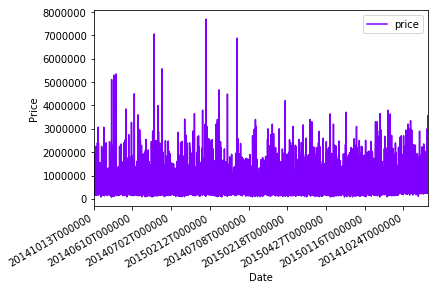

In [0]:
df.plot(
    x="date",
    y="price",
    kind='line',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap='rainbow',
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

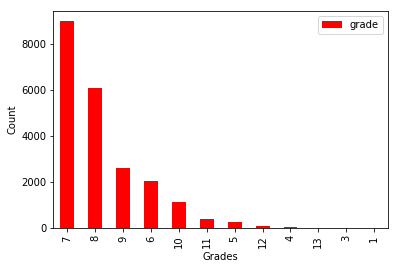

In [0]:
df["grade"].value_counts().plot(
    kind='bar',
    ax=None,
    subplots=False,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap="prism",
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Grades")
plt.ylabel("Count")
plt.show()

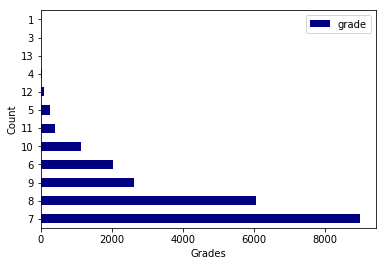

In [0]:
df["grade"].value_counts().plot(
    kind='barh',
    ax=None,
    subplots=False,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap="jet",
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Grades")
plt.ylabel("Count")
plt.show()

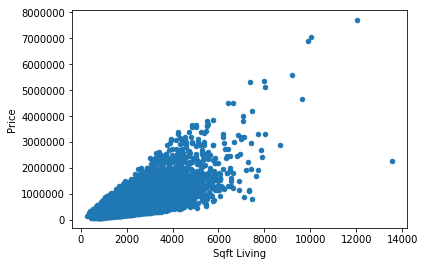

In [0]:
import matplotlib.pyplot as plt

df.plot(
    x="sqft_living",
    y="price",
    kind='scatter',
    ax=None,
    subplots=False,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap=None,
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

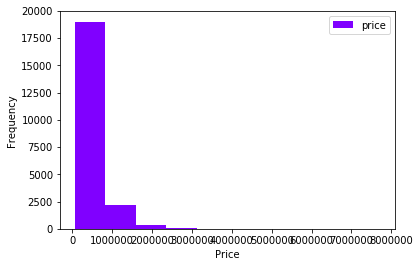

In [0]:
df.plot(
    x="date",
    y="price",
    kind='hist',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap='rainbow',
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

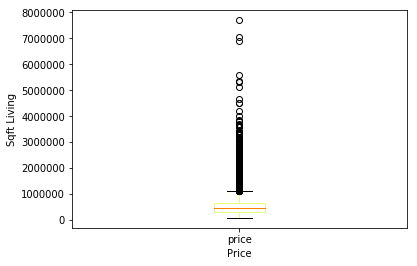

In [0]:
df.plot(
    x="sqft_living",
    y="price",
    kind='box',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap='Wistia',
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Price")
plt.ylabel("Sqft Living")
plt.show()

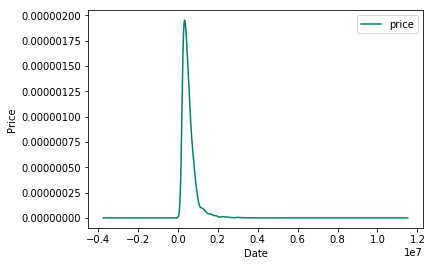

In [0]:
df.plot(
    x="date",
    y="price",
    kind='kde',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap='summer',
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

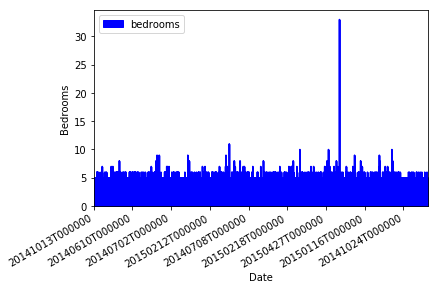

In [0]:
df.plot(
    x="date",
    y="bedrooms",
    kind='area',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap='winter',
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.xlabel("Date")
plt.ylabel("Bedrooms")
plt.show()

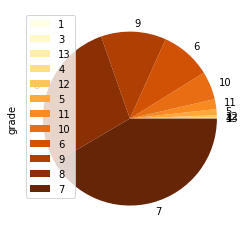

In [0]:
df['grade'].value_counts().sort_values(ascending=True,).plot(
    kind='pie',
    ax=None,
    subplots=True,
    sharex=None,
    sharey=False,
    layout=None,
    figsize=None,
    use_index=True,
    title=None,
    grid=None,
    legend=True,
    style=None,
    logx=False,
    logy=False,
    loglog=False,
    xticks=None,
    yticks=None,
    xlim=None,
    ylim=None,
    rot=None,
    fontsize=None,
    colormap='YlOrBr',
    table=False,
    yerr=None,
    xerr=None,
    secondary_y=False,
    sort_columns=False
)

plt.show()

# Neuro-linguistic programming (NLP)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    )

In [0]:
corpus = ['This is an example of NLP',
          'This is the first document.',
          'And the second one.',
          'Is this the first document?']

X = vectorizer.fit_transform(corpus)
X    

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [0]:
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (['this', 'is', 'text', 'document', 'analyze'])

False

In [0]:
vectorizer.get_feature_names()
X.toarray()


array([[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]])

In [0]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                     token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True

In [0]:
X2 = bigram_vectorizer.fit_transform(corpus).toarray()
X2

array([[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1]])

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
                 use_idf=True)

tfidf = transformer.fit_transform(X.toarray())
tfidf.toarray() 

array([[0.46714844, 0.        , 0.        , 0.46714844, 0.        ,
        0.25208067, 0.46714844, 0.46714844, 0.        , 0.        ,
        0.        , 0.25208067],
       [0.        , 0.        , 0.51741994, 0.        , 0.51741994,
        0.3935112 , 0.        , 0.        , 0.        , 0.        ,
        0.3935112 , 0.3935112 ],
       [0.        , 0.55121857, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.55121857, 0.55121857,
        0.29744623, 0.        ],
       [0.        , 0.        , 0.51741994, 0.        , 0.51741994,
        0.3935112 , 0.        , 0.        , 0.        , 0.        ,
        0.3935112 , 0.3935112 ]])

In [0]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['words', 'wprds'])
ngram_vectorizer.get_feature_names() == ([' w', 'ds', 'or', 'pr', 'rd', 's ', 'wo', 'wp'])

counts.toarray().astype(int)

array([[1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1]])

In [0]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])

<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

## Vader Algorithm

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentences = ["The food was good.",
             "The service was not very good!", 
             "Not bad at all",
             "The service was horrible"]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<50} {}".format(sentence, str(vs)))

     |████████████████████████████████| 133kB 3.5MB/s 
The food was good.-------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
The service was not very good!-------------------- {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.4432}
Not bad at all------------------------------------ {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.431}
The service was horrible-------------------------- {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


## Spacy

In [0]:
!pip install spacy
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors

nlp = spacy.load("en")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts

for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'be', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


In [0]:
import spacy

nlp = spacy.load("en")
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [0]:
import spacy

nlp = spacy.load("en")
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [0]:
import re
import spacy
from spacy.tokenizer import Tokenizer

prefix_re = re.compile(r'''^[[("']''')
suffix_re = re.compile(r'''[])"']$''')
infix_re = re.compile(r'''[-~]''')
simple_url_re = re.compile(r'''^https?://''')

def custom_tokenizer(nlp):
    return Tokenizer(nlp.vocab, prefix_search=prefix_re.search,
                                suffix_search=suffix_re.search,
                                infix_finditer=infix_re.finditer,
                                token_match=simple_url_re.match)

nlp = spacy.load("en")

nlp.tokenizer = custom_tokenizer(nlp)
doc = nlp(u"hello-world.")

print([t.text for t in doc])

['hello', '-', 'world.']


In [0]:
import spacy

nlp = spacy.load("en")
doc = nlp("I live in New York")

print("Before:", [token.text for token in doc])

with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[3:5], attrs={"LEMMA": "new york"})
    
print("After:", [token.text for token in doc])

Before: ['I', 'live', 'in', 'New', 'York']
After: ['I', 'live', 'in', 'New York']


In [0]:
import spacy

nlp = spacy.load("en")
doc = nlp(u"This is a sentence. This is another sentence.")

for sent in doc.sents:
    print(sent.text)

This is a sentence.
This is another sentence.


In [0]:
from spacy.lang.en import English
from spacy.matcher import Matcher

nlp = English()  # We only want the tokenizer, so no need to load a model
matcher = Matcher(nlp.vocab)

pos_emoji = [u"😀", u"😃", u"😂", u"🤣", u"😊", u"😍"]  # Positive emoji
neg_emoji = [u"😞", u"😠", u"😩", u"😢", u"😭", u"😒"]  # Negative emoji

# Add patterns to match one or more emoji tokens
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]

# Function to label the sentiment
def label_sentiment(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == "HAPPY":  # Don't forget to get string!
        doc.sentiment += 0.1  # Add 0.1 for positive sentiment
    elif doc.vocab.strings[match_id] == "SAD":
        doc.sentiment -= 0.1  # Subtract 0.1 for negative sentiment

matcher.add("HAPPY", label_sentiment, *pos_patterns)  # Add positive pattern
matcher.add("SAD", label_sentiment, *neg_patterns)  # Add negative pattern

# Add pattern for valid hashtag, i.e. '#' plus any ASCII token
matcher.add("HASHTAG", None, [{"ORTH": "#"}, {"IS_ASCII": True}])

doc = nlp(u"Hello world 😀 #MondayMotivation")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = doc.vocab.strings[match_id]  # Look up string ID
    span = doc[start:end]
    print(string_id, span.text)

HAPPY 😀
HASHTAG #MondayMotivation


In [0]:
import spacy

nlp = spacy.load("en")
doc = nlp("Dr Alex Smith chaired first board meeting of Acme Corp Inc.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('Alex Smith', 'PERSON'), ('first', 'ORDINAL'), ('Acme Corp Inc.', 'ORG')]


In [0]:
import spacy
from spacy.pipeline import merge_entities
from spacy import displacy

nlp = spacy.load("en")

def extract_person_orgs(doc):
    person_entities = [ent for ent in doc.ents if ent.label_ == "PERSON"]
    for ent in person_entities:
        head = ent.root.head
        if head.lemma_ == "work":
            preps = [token for token in head.children if token.dep_ == "prep"]
            for prep in preps:
                orgs = [token for token in prep.children if token.ent_type_ == "ORG"]
                print({'person': ent, 'orgs': orgs, 'past': head.tag_ == "VBD"})
    return doc

# To make the entities easier to work with, we'll merge them into single tokens
nlp.add_pipe(merge_entities)
nlp.add_pipe(extract_person_orgs)

doc = nlp("Alex Smith worked at Acme Corp Inc.")
# If you're not in a Jupyter / IPython environment, use displacy.serve
displacy.render(doc, options={'fine_grained': True})

{'person': Alex Smith, 'orgs': [Acme Corp Inc.], 'past': True}


'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="61ef71ef3d4248f4996491a946b1ace0-0" class="displacy" width="750" height="224.5" direction="ltr" style="max-width: none; height: 224.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="134.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">Alex Smith</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">NNP</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="134.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">worked</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">VBD</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="134.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">at</tspan>\n    <tspan class="displac

In [0]:
import spacy
from spacy import displacy

text = """But Google is starting from behind. The company made a late push
into hardware, and Apple’s Siri, available on iPhones, and Amazon’s Alexa
software, which runs on its Echo and Dot devices, have clear leads in
consumer adoption."""

nlp = spacy.load("en")
doc = nlp(text)
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## NLTK

In [0]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
  
# choose some words to be stemmed 
words = ["program", "programs", "programer", "programing", "programers"] 
  
for w in words: 
    print(w, " : ", ps.stem(w)) 

program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


In [0]:
import nltk
nltk.download('punkt')

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
   
sentence = "Programers program with programing languages"
words = word_tokenize(sentence) 
   
for w in words: 
    print(w, " : ", ps.stem(w)) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Programers  :  program
program  :  program
with  :  with
programing  :  program
languages  :  languag


In [0]:
import random 
from nltk.corpus import names 
import nltk 
nltk.download('names')
  
def gender_features(word): 
    return {'last_letter':word[-1]} 
  
# preparing a list of examples and corresponding class labels. 
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
             [(name, 'female') for name in names.words('female.txt')]) 
  
random.shuffle(labeled_names) 
  
# we use the feature extractor to process the names data. 
featuresets = [(gender_features(n), gender)  
               for (n, gender)in labeled_names] 
  
# Divide the resulting list of feature 
# sets into a training set and a test set. 
train_set, test_set = featuresets[500:], featuresets[:500] 
  
# The training set is used to  
# train a new "naive Bayes" classifier. 
classifier = nltk.NaiveBayesClassifier.train(train_set) 
  
print(classifier.classify(gender_features('Myron'))) 
  
# output should be 'male' 
print(nltk.classify.accuracy(classifier, train_set)) 

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
male
0.7634336378291241


In [0]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     36.5 : 1.0
             last_letter = 'k'              male : female =     32.4 : 1.0
             last_letter = 'f'              male : female =     16.1 : 1.0
             last_letter = 'p'              male : female =     11.3 : 1.0
             last_letter = 'v'              male : female =     10.6 : 1.0
             last_letter = 'd'              male : female =     10.1 : 1.0
             last_letter = 'm'              male : female =      9.6 : 1.0
             last_letter = 'o'              male : female =      8.6 : 1.0
             last_letter = 'r'              male : female =      6.6 : 1.0
             last_letter = 'w'              male : female =      5.4 : 1.0


In [0]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
rocks : rock
corpora : corpus
better : good


## TextBlob

In [0]:
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
 
text = "The service was good"

blob = TextBlob(text)
blob.tags          

blob.noun_phrases   
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
0.7


In [0]:
from textblob import Word
w = Word('falibility')
w.spellcheck()

[('fallibility', 1.0)]

In [0]:
en_blob = TextBlob(u'Good Morning')
print(en_blob.translate(to='es'))
print(en_blob.translate(to='fr'))
print(en_blob.translate(to='zh-CN'))
print(en_blob.translate(to='ar'))

Buenos días
Bonjour
早上好
صباح الخير


In [0]:
b = TextBlob(u"بسيط هو أفضل من مجمع")
b.detect_language()

'ar'

In [0]:
blob = TextBlob("Now is better than never.")
blob.ngrams(n=3)

[WordList(['Now', 'is', 'better']),
 WordList(['is', 'better', 'than']),
 WordList(['better', 'than', 'never'])]

In [0]:
from textblob import Word
from textblob.wordnet import VERB
word = Word("octopus")
word.synsets
Word("hack").get_synsets(pos=VERB)

[Synset('chop.v.05'),
 Synset('hack.v.02'),
 Synset('hack.v.03'),
 Synset('hack.v.04'),
 Synset('hack.v.05'),
 Synset('hack.v.06'),
 Synset('hack.v.07'),
 Synset('hack.v.08')]

In [0]:
 Word("rain").definitions

['water falling in drops from vapor condensed in the atmosphere',
 'drops of fresh water that fall as precipitation from clouds',
 'anything happening rapidly or in quick successive',
 'precipitate as rain']

## Google Translation

In [0]:
#!pip install googletrans
from googletrans import Translator
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.uk',
      'translate.google.co.in'
    ])
translations = translator.translate(['صباح الخير', '早上好', 'Buenos días'], dest='en')
for translation in translations:
    print(translation.origin, ' -> ', translation.text)

صباح الخير  ->  good morning
早上好  ->  Good morning
Buenos días  ->  Good Morning


In [0]:
from googletrans import Translator
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.uk',
      'translate.google.co.in'
    ])
translations = translator.translate('안녕하세요', dest='ja')
print(translations)

Translated(src=ko, dest=ja, text=こんにちは, pronunciation=Kon'nichiwa, extra_data="{'translat...")


In [0]:
a = translator.detect('안녕하세요')
print(a)

Detected(lang=ko, confidence=1)


In [0]:
def google_translator(x):
    translator = Translator()
    translations=translator.translate(x, dest='en')
    return translations.text

In [0]:
a = google_translator('안녕하세요')
print(a)

Hi


# Ethical AI (Detecting Bias)

## Microsofts Model Interpretation

In [0]:
#!pip install interpret
from interpret.glassbox import LinearRegression

ebm = LinearRegression()
ebm.fit(X_train, y_train)

In [0]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7554/140370454905744/ -->

In [0]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

<!-- http://127.0.0.1:7554/140370458563976/ -->

In [0]:
#!pip install xai
import xai.data
df = xai.data.pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


W0616 17:55:52.548324 140373151274880 __init__.py:991] No categorical_cols passed so inferred using np.object, np.int8 and np.bool: Index(['date'], dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


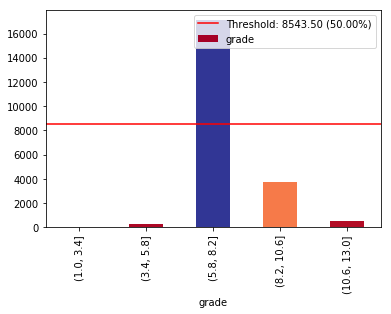

In [0]:
ims = xai.imbalance_plot(df, "grade")

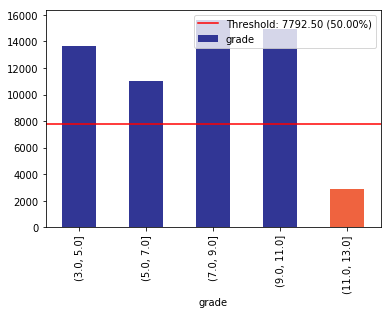

In [0]:
bal_df = xai.balance(df, "grade", upsample=0.8)

# Recommendation System

In [0]:
import numpy as np
import pandas

#Class for Popularity based Recommender System model
class Recommender():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id
        #Get a count of user_ids for each unique item as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
        #Sort the items based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to make recommendations
    
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        user_recommendations['user_id'] = user_id
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        return user_recommendations
    

#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.items_dict = None
        self.rev_items_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (items) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())        
        return user_items
        
    #Get unique users for a given item (item)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())       
        return item_users
        
    #Get unique items (items) in the data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())    
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_items, all_items):  
        user_items_users = []        
        for i in range(0, len(user_items)):
            user_items_users.append(self.get_item_users(user_items[i]))

        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_items), len(all_items))), float)

        for i in range(0,len(all_items)):
            items_i_data = self.train_data[self.train_data[self.item_id] == all_items[i]]
            users_i = set(items_i_data[self.user_id].unique())
            for j in range(0,len(user_items)):       
                users_j = user_items_users[j]
                users_intersection = users_i.intersection(users_j)
                if len(users_intersection) != 0:
                    users_union = users_i.union(users_j)
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    
    def generate_top_recommendations(self, user, cooccurence_matrix, all_items, user_items):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        columns = ['user_id', 'item', 'score', 'rank']
        df = pandas.DataFrame(columns=columns)
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_items[sort_index[i][1]] not in user_items and rank <= 10:
                df.loc[len(df)]=[user,all_items[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        if df.shape[0] == 0:
            print("The current user has no items in the item similarity based recommendation model.")
            return -1
        else:
            return df
    
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    def recommend(self, user):
        user_items = self.get_user_items(user)    
        print("No. of unique items for the user: %d" % len(user_items))
        all_items = self.get_all_items_train_data()
        print("no. of unique items in the training set: %d" % len(all_items))
        cooccurence_matrix = self.construct_cooccurence_matrix(user_items, all_items)
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_items, user_items)
        return df_recommendations
    
    
    def get_similar_items(self, item_list):
        user_items = item_list
        all_items = self.get_all_items_train_data()
        print("no. of unique items in the training set: %d" % len(all_items)) 
        cooccurence_matrix = self.construct_cooccurence_matrix(user_items, all_items)
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_items, user_items)
        return df_recommendations

In [0]:
import pandas as pd
item_df =  pd.read_csv("recomm.csv")

In [4]:
item_df.head(5)

,user_id,item_id,item_count,title
0,101,1,1,Pizza
1,102,2,2,Momo
2,103,3,4,Burger
3,104,4,1,French Fries
4,105,5,1,Roll


In [5]:
item_grouped = item_df.groupby(['title']).agg({'item_count': 'count'}).reset_index()
grouped_sum = item_grouped['item_count'].sum()
item_grouped['percentage']  = item_grouped['item_count'].div(grouped_sum)*100
item_grouped.sort_values(['item_count', 'title'], ascending = [0,1])

,title,item_count,percentage
5,Ice Cream,5,12.195122
9,Roll,5,12.195122
0,Burger,4,9.756098
6,Momo,4,9.756098
7,Noodles,4,9.756098
8,Pizza,4,9.756098
12,Wraps,3,7.317073
1,Chicken Wings,2,4.878049
2,Cold Drink,2,4.878049
3,French Fries,2,4.878049


In [0]:
pm = Recommender()
pm.create(item_df,'user_id', 'title')

In [0]:
users = item_df['user_id'].unique()

##  User based Collaborative filtering

In [8]:
item_df[item_df["user_id"]==111]

,user_id,item_id,item_count,title
10,111,11,2,Chicken Wings
24,111,25,1,Noodles


### Recommendations based on Popular Items Purchased

In [9]:
user_id = users[10]
pm.recommend(user_id)

,user_id,title,score,Rank
5,111,Ice Cream,5,1.0
9,111,Roll,5,2.0
0,111,Burger,4,3.0
6,111,Momo,4,4.0
7,111,Noodles,4,5.0
8,111,Pizza,4,6.0
12,111,Wraps,3,7.0
1,111,Chicken Wings,2,8.0
2,111,Cold Drink,2,9.0
3,111,French Fries,2,10.0


### Recommendations based on Similar Items Purchased

In [0]:
model = item_similarity_recommender_py() 
model.create(item_df, 'user_id', 'title')

In [11]:
#Print the items for the user in data
user_id = users[10]
user_items = model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Data items for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend items for the user using personalized model
model.recommend(user_id)

------------------------------------------------------------------------------------
Data items for the user userid: 111:
------------------------------------------------------------------------------------
Chicken Wings
Noodles
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique items for the user: 2
no. of unique items in the training set: 13
Non zero values in cooccurence_matrix :8


,user_id,item,score,rank
0,111,Subway,0.100000,1
1,111,Momo,0.100000,2
2,111,Ice Cream,0.083333,3
3,111,Roll,0.062500,4
4,111,Wraps,0.000000,5
5,111,Cold Drink,0.000000,6
6,111,Fried Rice,0.000000,7
7,111,Thai Food,0.000000,8
8,111,French Fries,0.000000,9
9,111,Burger,0.000000,10


In [12]:
model.get_similar_items(['Chicken Wings'])

no. of unique items in the training set: 13
Non zero values in cooccurence_matrix :4


,user_id,item,score,rank
0,,Noodles,0.200000,1
1,,Momo,0.200000,2
2,,Ice Cream,0.166667,3
3,,Wraps,0.000000,4
4,,Cold Drink,0.000000,5
5,,Fried Rice,0.000000,6
6,,Thai Food,0.000000,7
7,,Subway,0.000000,8
8,,Roll,0.000000,9
9,,French Fries,0.000000,10


## Item based Collaborative filtering

In [13]:
from scipy.sparse import csr_matrix 

item_data = item_df[["user_id","title","item_count"]]
wide_item_data = item_data.pivot(index = 'title', columns = 'user_id', values = 'item_count').fillna(0)
wide_item_sparse = csr_matrix(wide_item_data.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(wide_item_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [14]:
wide_item_data

user_id,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
title,,,,,,,,,,,,,,,,,,,,,,,,
Burger,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
Chicken Wings,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cold Drink,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
French Fries,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fried Rice,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ice Cream,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Momo,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Noodles,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Pizza,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


In [15]:
query_index = np.random.choice(wide_item_data.shape[0])

distances, indices = model_knn.kneighbors(wide_item_data.iloc[query_index, :].values.reshape(1,-1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print ('Recommendations for {0}:\n'.format(wide_item_data.index[query_index]))
    else:
        print ('{0}:{1}, with distance of {2}:'.format(i, wide_item_data.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Cold Drink:

1:Wraps, with distance of 0.7113248654051871:
2:Ice Cream, with distance of 0.8804771390665607:
3:Thai Food, with distance of 1.0:
4:Pizza, with distance of 1.0:
5:Subway, with distance of 1.0:


## Binary Count Data

Another approach would be convert each vector into a binary (1 or 0) : We can do this by applying the sign function in numpy to each column in the dataframe.


In [0]:
wide_item_data_zero_one = wide_item_data.apply(np.sign)
wide_item_data_zero_one_sparse = csr_matrix(wide_item_data_zero_one.values)

In [17]:
wide_item_data_zero_one

user_id,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
title,,,,,,,,,,,,,,,,,,,,,,,,
Burger,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Chicken Wings,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cold Drink,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
French Fries,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fried Rice,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ice Cream,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Momo,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Noodles,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Pizza,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
model_nn_binary = NearestNeighbors(metric='cosine', algorithm='brute')
model_nn_binary.fit(wide_item_data_zero_one_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [19]:
distances, indices = model_nn_binary.kneighbors(wide_item_data_zero_one.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations with binary purchased data with {0}:\n'.format(wide_item_data_zero_one.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, wide_item_data_zero_one.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations with binary purchased data with Cold Drink:

1: Wraps, with distance of 0.591751709536137:
2: Ice Cream, with distance of 0.6837722339831621:
3: Thai Food, with distance of 1.0:
4: Pizza, with distance of 1.0:
5: Subway, with distance of 1.0:


In [0]:
item_it = item_df[["item_id","title"]]
item_rat = item_df[["user_id","item_id","item_count"]]

## Matrix Factorization via Singular Value Decomposition¶

Matrix factorization is the breaking down of one matrix in a product of multiple matrices. It's extremely well studied in mathematics, and it's highly useful. There are many different ways to factor matrices, but singular value decomposition is particularly useful for making recommendations.

So what is singular value decomposition (SVD)? At a high level, SVD is an algorithm that decomposes a matrix RR into the best lower rank (i.e. smaller/simpler) approximation of the original matrix RR. Mathematically, it decomposes R into a two unitary matrices and a diagonal matrix:
R=UΣVT
R=UΣVT

where R is users's ratings matrix, UU is the user "features" matrix, ΣΣ is the diagonal matrix of singular values (essentially weights), and VTVT is the movie "features" matrix. UU and VTVT are orthogonal, and represent different things. UU represents how much users "like" each feature and VTVT represents how relevant each feature is to each movie.

To get the lower rank approximation, we take these matrices and keep only the top kk features, which we think of as the underlying tastes and preferences vectors.

In [21]:
item_it.head(5)

,item_id,title
0,1,Pizza
1,2,Momo
2,3,Burger
3,4,French Fries
4,5,Roll


In [22]:
item_rat.head(5)

,user_id,item_id,item_count
0,101,1,1
1,102,2,2
2,103,3,4
3,104,4,1
4,105,5,1


In [23]:
R_df = item_rat.pivot(columns ='item_id', values = 'item_count').fillna(0)
R_df.head()

item_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 10)

sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
preds_df.head()
preds_df.index = R_df.index

preds_df.head()

item_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.058665,0.007144,0.001007,0.058665,0.058665,0.058665,0.007144,0.058665,0.058665,0.058665,0.007144,0.001007,0.000609,0.058665,0.007144,0.058665,0.066894,0.066894,0.066894,0.056502,0.002384,0.001349,0.056502,0.066894,0.056502
1,0.014288,1.993653,-0.001055,0.014288,0.014288,0.014288,-0.006347,0.014288,0.014288,0.014288,-0.006347,-0.001055,-0.000649,0.014288,-0.006347,0.014288,-0.045462,-0.045462,-0.045462,0.028390,-0.002371,-0.001393,0.028390,-0.045462,0.028390
2,0.004028,-0.002109,3.999646,0.004028,0.004028,0.004028,-0.002109,0.004028,0.004028,0.004028,-0.002109,-0.000354,-0.000218,0.004028,-0.002109,0.004028,-0.014797,-0.014797,-0.014797,0.011188,-0.000793,-0.000467,0.011188,-0.014797,0.011188
3,0.058665,0.007144,0.001007,0.058665,0.058665,0.058665,0.007144,0.058665,0.058665,0.058665,0.007144,0.001007,0.000609,0.058665,0.007144,0.058665,0.066894,0.066894,0.066894,0.056502,0.002384,0.001349,0.056502,0.066894,0.056502
4,0.058665,0.007144,0.001007,0.058665,0.058665,0.058665,0.007144,0.058665,0.058665,0.058665,0.007144,0.001007,0.000609,0.058665,0.007144,0.058665,0.066894,0.066894,0.066894,0.056502,0.002384,0.001349,0.056502,0.066894,0.056502


In [0]:
def recommend_items(preds_df, user_id, item_it, item_rat, num_recommendations=5):
    
    # Get and sort the user's predictions
    sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False) # UserID starts at 1
    tuser_id = user_id + 100
    # Get the user's data and merge in the movie information.
    user_data = item_rat[item_rat.user_id == (tuser_id)]
    
    user_full = (user_data.merge(item_it, how = 'left', left_on = 'item_id', right_on = 'item_id').
                     sort_values(['item_count'], ascending=False)
                 )

    print ('User {0} has already bought {1} items.'.format(user_id, user_full.shape[0]))
    print ('Recommending highest {0} predicted count item not already bought.'.format(num_recommendations))
    
    #Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (item_it[~item_it["item_id"].isin(user_full["item_id"])].merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                   left_on = 'item_id',
                   right_on = 'item_id')).iloc[:num_recommendations, :-1]


    return user_full , recommendations

In [27]:
already_rated, predictions = recommend_items(preds_df,11, item_it, item_rat, 10)

User 11 has already bought 3 items.
Recommending highest 10 predicted count item not already bought.


In [28]:
already_rated.head(10)

,user_id,item_id,item_count,title
0,111,11,2,Chicken Wings
1,111,11,2,Chicken Wings
2,111,25,1,Noodles


In [29]:
predictions

,item_id,title
0,1,Pizza
1,2,Momo
2,3,Burger
3,4,French Fries
4,5,Roll
5,6,Ice Cream
6,7,Subway
7,8,Thai Food
8,9,Fried Rice
9,10,Cold Drink


### Conclusion

We've seen that we can make good recommendations with raw data based collaborative filtering methods (neighborhood models) and latent features from low-rank matrix factorization methods (factorization models).

Low-dimensional matrix recommenders try to capture the underlying features driving the raw data (which we understand as tastes and preferences). From a theoretical perspective, if we want to make recommendations based on people's tastes, this seems like the better approach. This technique also scales significantly better to larger datasets.


# Time Series Analysis

In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [0]:
start = dt.datetime(2007, 1, 1)
end = dt.datetime.now()

In [0]:
df = web.DataReader("GOOGL", 'yahoo', start, end)

In [5]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,238.568573,230.785782,233.233231,234.029022,15397500.0,234.029022
2007-01-04,242.217224,234.409409,234.734741,241.871872,15759400.0,241.871872
2007-01-05,243.993988,239.294296,241.491486,243.838837,13730400.0,243.838837
2007-01-08,245.180176,241.341339,244.089096,242.032028,9499200.0,242.032028
2007-01-09,244.369370,240.840836,242.967972,242.992996,10752000.0,242.992996


In [6]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,1082.800049,1073.800049,1077.229980,1082.800049,1683600.0,1082.800049
2019-07-01,1108.589966,1095.329956,1101.040039,1100.000000,1459800.0,1100.000000
2019-07-02,1112.890015,1099.670044,1104.829956,1112.599976,1031500.0,1112.599976
2019-07-03,1127.989990,1114.849976,1118.500000,1122.989990,1007700.0,1122.989990
2019-07-05,1134.650024,1117.500000,1119.369995,1132.670044,1489200.0,1132.670044


In [0]:
df = df[["Close"]]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3148 entries, 2007-01-03 to 2019-07-05
Data columns (total 1 columns):
Close    3148 non-null float64
dtypes: float64(1)
memory usage: 49.2 KB


## ARIMA (Auto Regressive Moving Average)

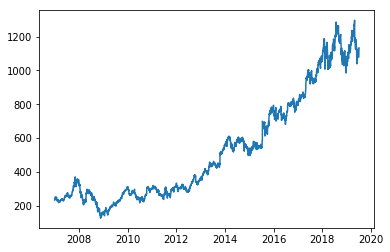

In [64]:
import numpy as np

ts = df['Close'] 
plt.plot(ts)
plt.show()
ts_log = np.log(ts)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq = 365)

In [0]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

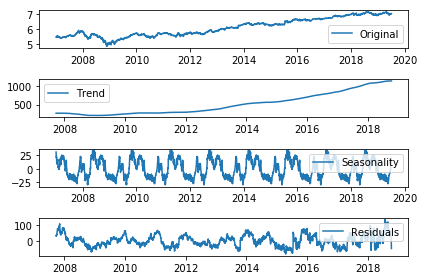

In [66]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

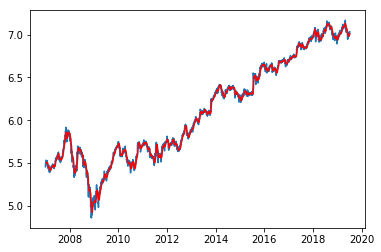

In [70]:
moving_avg = ts_log.rolling(window=12, center=False).mean()
rolstd = ts_log.rolling(window=12, center=False).std()

plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

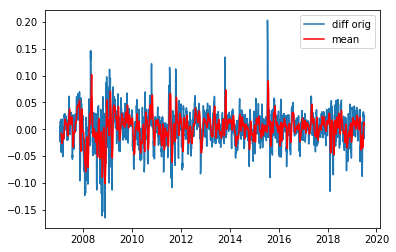

In [71]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)

moving_avg = ts_log_moving_avg_diff.rolling(window=12, center=False).mean()
rolstd = ts_log_moving_avg_diff.rolling(window=12, center=False).std()

plt.plot(ts_log_moving_avg_diff, label="diff orig")
plt.plot(moving_avg, color='red', label='mean')
plt.legend(loc='best')
plt.show()

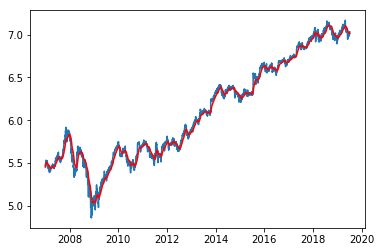

In [72]:
expwighted_avg = ts_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [74]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts_log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   -0.475865
p-value                           0.896641
#Lags Used                        0.000000
Number of Observations Used    3147.000000
Critical Value (1%)              -3.432430
Critical Value (5%)              -2.862459
Critical Value (10%)             -2.567259
dtype: float64


In [75]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts_log_moving_avg_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -1.221024e+01
p-value                        1.168315e-22
#Lags Used                     1.200000e+01
Number of Observations Used    3.124000e+03
Critical Value (1%)           -3.432445e+00
Critical Value (5%)           -2.862466e+00
Critical Value (10%)          -2.567263e+00
dtype: float64


In [97]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# seasonal difference
X = df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 1144.450300
Day 2: 1139.818815
Day 3: 1150.834929
Day 4: 1156.639600
Day 5: 1156.806461
Day 6: 1148.557769
Day 7: 1153.920626


## LSTM (Long Short Term Memory - RNN)

In [14]:
df = df.reset_index()
df.head(1)

,index,Date,Close
0,0,2007-01-03,234.029022


In [0]:
import numpy as np
X = df[["index"]]
y = df[["Close"]]

X = np.array(X)
y = np.array(y)

In [37]:
X.shape

(3148, 1, 1)

In [48]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
n_steps = 1
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=200, verbose=0)
x_input = array([3148])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1083.7775]]


In [46]:
df.tail(1)

,index,Date,Close
3147,3147,2019-07-05,1132.670044


## Facebook's Prophet

In [0]:
df = df.reset_index()
df = df.rename(columns={"Date": "ds", "Close": "y"})

In [0]:
from fbprophet import Prophet

In [29]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_country_holidays(country_name='US')
m.fit(df)
future = m.make_future_dataframe(periods=60)
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


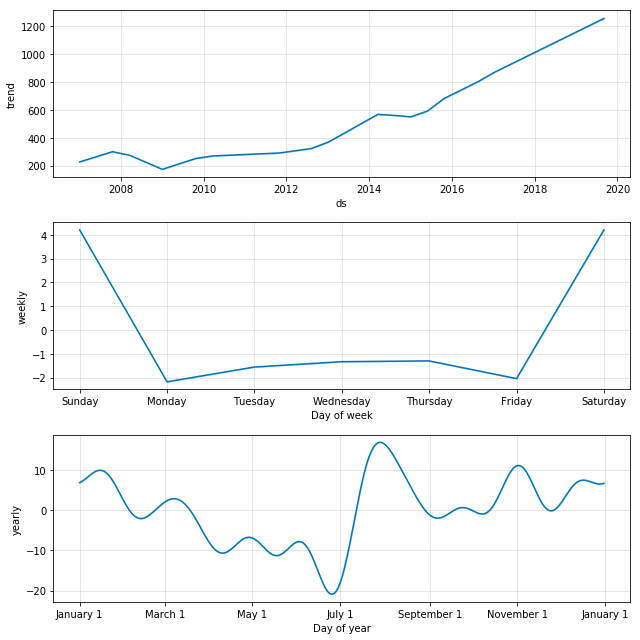

In [30]:
fig = m.plot_components(forecast)

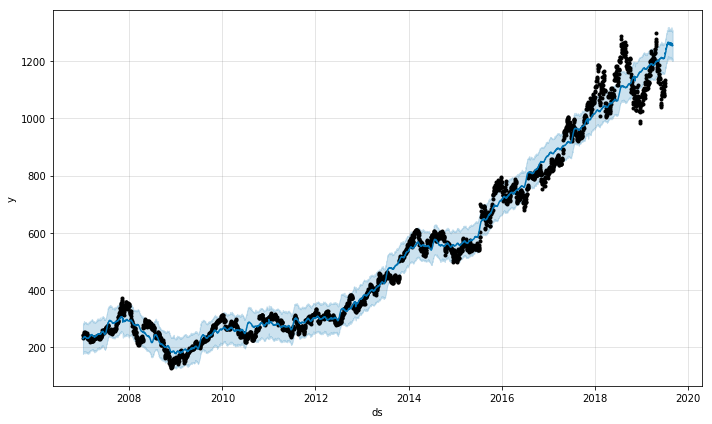

In [31]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [32]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-03,225.991598,157.873009,304.861562,225.991598,225.991598,6.183215,6.183215,6.183215,-1.099881,-1.099881,-1.099881,7.283096,7.283096,7.283096,0.0,0.0,0.0,232.174814
1,2007-01-04,226.245851,158.092459,312.324897,226.245851,226.245851,6.436843,6.436843,6.436843,-1.068302,-1.068302,-1.068302,7.505145,7.505145,7.505145,0.0,0.0,0.0,232.682693
2,2007-01-05,226.500103,151.224140,304.597332,226.500103,226.500103,5.948133,5.948133,5.948133,-1.803299,-1.803299,-1.803299,7.751432,7.751432,7.751432,0.0,0.0,0.0,232.448236
3,2007-01-08,227.262861,154.236398,312.255013,227.262861,227.262861,6.568138,6.568138,6.568138,-1.997069,-1.997069,-1.997069,8.565208,8.565208,8.565208,0.0,0.0,0.0,233.831000
4,2007-01-09,227.517114,151.896646,311.817116,227.517114,227.517114,7.505903,7.505903,7.505903,-1.328507,-1.328507,-1.328507,8.834409,8.834409,8.834409,0.0,0.0,0.0,235.023016


In [36]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 2009-02-22 00:00:00 and 2018-07-05 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-02-23,167.021491,156.274338,179.034223,165.195190,2009-02-22
1,2009-02-24,168.249882,156.708836,179.849616,172.897903,2009-02-22
2,2009-02-25,167.772060,156.518332,179.756806,170.990997,2009-02-22
3,2009-02-26,166.124041,154.788168,177.433418,168.758759,2009-02-22
4,2009-02-27,165.090707,154.293485,176.705929,169.164169,2009-02-22


In [37]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,2654.276449,51.519671,38.108130,0.067779,0.461386
1,38 days,2664.213979,51.616024,38.294923,0.068490,0.457540
2,39 days,2681.497724,51.783180,38.533218,0.069001,0.453280
3,40 days,2691.024567,51.875086,38.595700,0.069217,0.457654
4,41 days,2698.511784,51.947202,38.708917,0.069473,0.456262


## Gluon Time Series

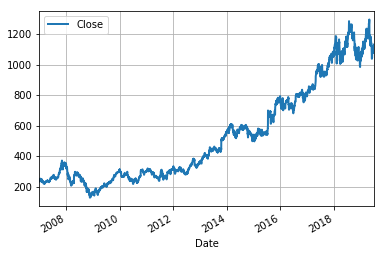

In [49]:
import matplotlib.pyplot as plt
df.plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [0]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.Close[:"2019-06-27 00:00:00"]}],
    freq = "1440min"
)

In [46]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="1440min", prediction_length=7, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

INFO:root:Start model training
INFO:root:Number of parameters in DeepARTrainingNetwork: 13463
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 21.88it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[0] Elapsed time 2.291 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=5.377945
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.04it/s, avg_epoch_loss=4.45]
INFO:root:Epoch[1] Elapsed time 2.082 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.451150
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.12it/s, avg_epoch_loss=4.41]
INFO:root:Epoch[2] Elapsed time 2.078 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.407903
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.04it/s, avg_epoch_loss=4.23]
INFO:root:Epoch[3] Elapsed time 2.085 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.230802
INFO:root:Epoch[4] Learning rate is 0.001


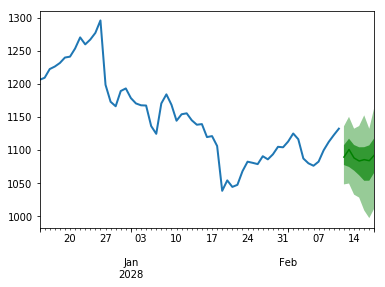

In [47]:
test_data = ListDataset(
    [{"start": df.index[3144], "target": df.Close[:"2019-07-05 00:00:00"]}],
    freq = "1440min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])

In [54]:
forecast.mean

array([1092.9272, 1099.5981, 1087.8707, 1083.4   , 1082.7875, 1080.3273,
       1093.2021], dtype=float32)